# Assignment 8

## Title: Data Analytics I

### Problem Statement

Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features.

### Step 1: Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from sklearn import datasets
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Step 2: Reading Dataset

#### Description
Housing Values in Suburbs of Boston
The medv variable is the target variable.

__Data description__
The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

- __CRIM__
per capita crime rate by town.

- __ZN__
proportion of residential land zoned for lots over 25,000 sq.ft.

- __INDUS__
proportion of non-retail business acres per town.

- __CHAS__
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

- __NOX__
nitrogen oxides concentration (parts per 10 million).

- __RM__
average number of rooms per dwelling.

- __AGE__
proportion of owner-occupied units built prior to 1940.

- __DIS__
weighted mean of distances to five Boston employment centres.

- __RAD__
index of accessibility to radial highways.

- __TAX__
full-value property-tax rate per \$10,000.

- __PIRATIO__
pupil-teacher ratio by town.

- __B__
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

- __LSTAT__
lower status of the population (percent).

- __MEDV__
median value of owner-occupied homes in \$1000s.

#### __Source__
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.
<br>
Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, names=column_names, skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
# Dimension of the dataset
data.shape

(506, 14)

In [4]:
# Let's summarize the data to see the distribution of data
data.info()
data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


In [5]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
data = data.dropna()
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

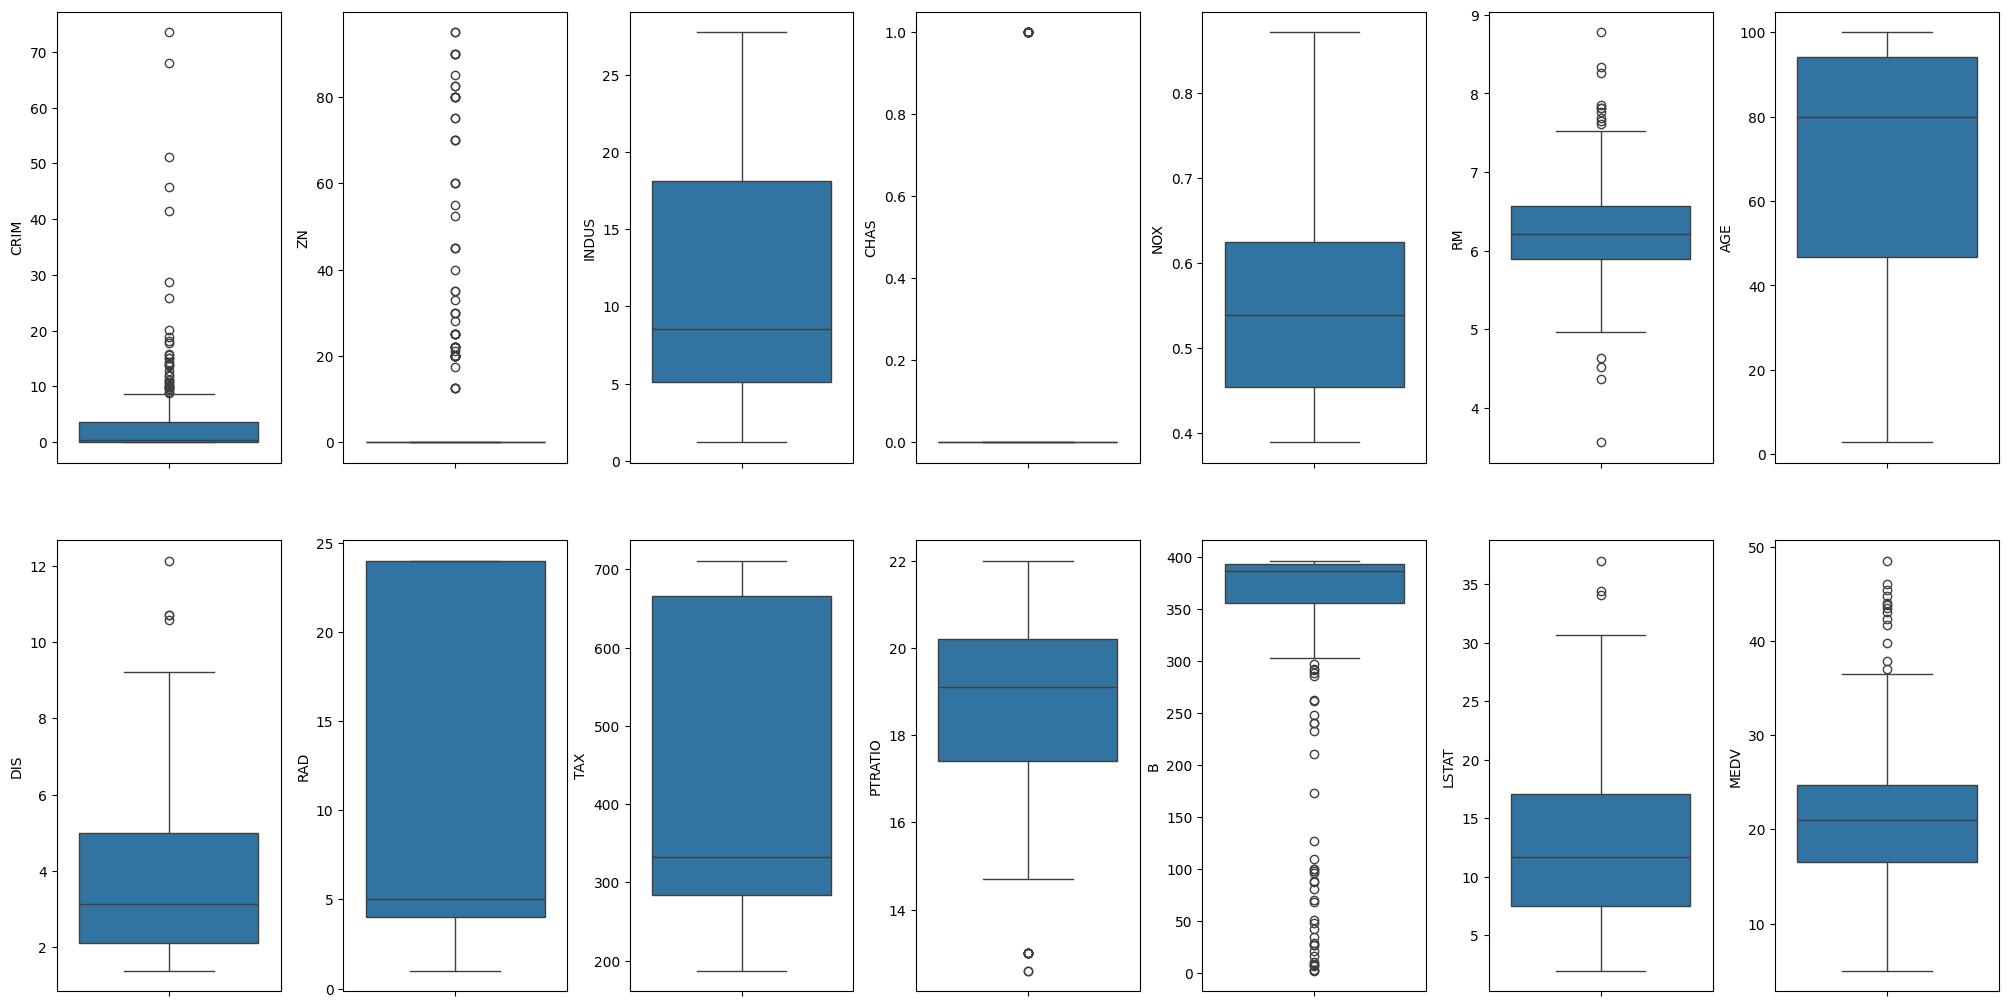

In [11]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for col, value in data.items():
    sns.boxplot(y=col, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()



Columns like CRIM, ZN, RM, B seems to have outliers. Let's see the outliers percentage in every column.


In [9]:
for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    prec = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (k, prec))

Column CRIM outliers = 13.71%
Column ZN outliers = 12.69%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.84%
Column AGE outliers = 0.00%
Column DIS outliers = 1.02%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 3.05%
Column B outliers = 14.72%
Column LSTAT outliers = 1.52%
Column MEDV outliers = 6.85%




Let's remove MEDV outliers (MEDV = 50.0) before plotting more distributions


In [10]:
data = data[~(data['MEDV'] >= 50.0)]
data = data[~(data['CRIM'] >= 88.97)]
data = data[~(data['ZN'] >= 100.0)]
data = data[~(data['B'] >= 396.9)]
data.shape

(278, 14)

Let's see how these features plus MEDV distributions looks like

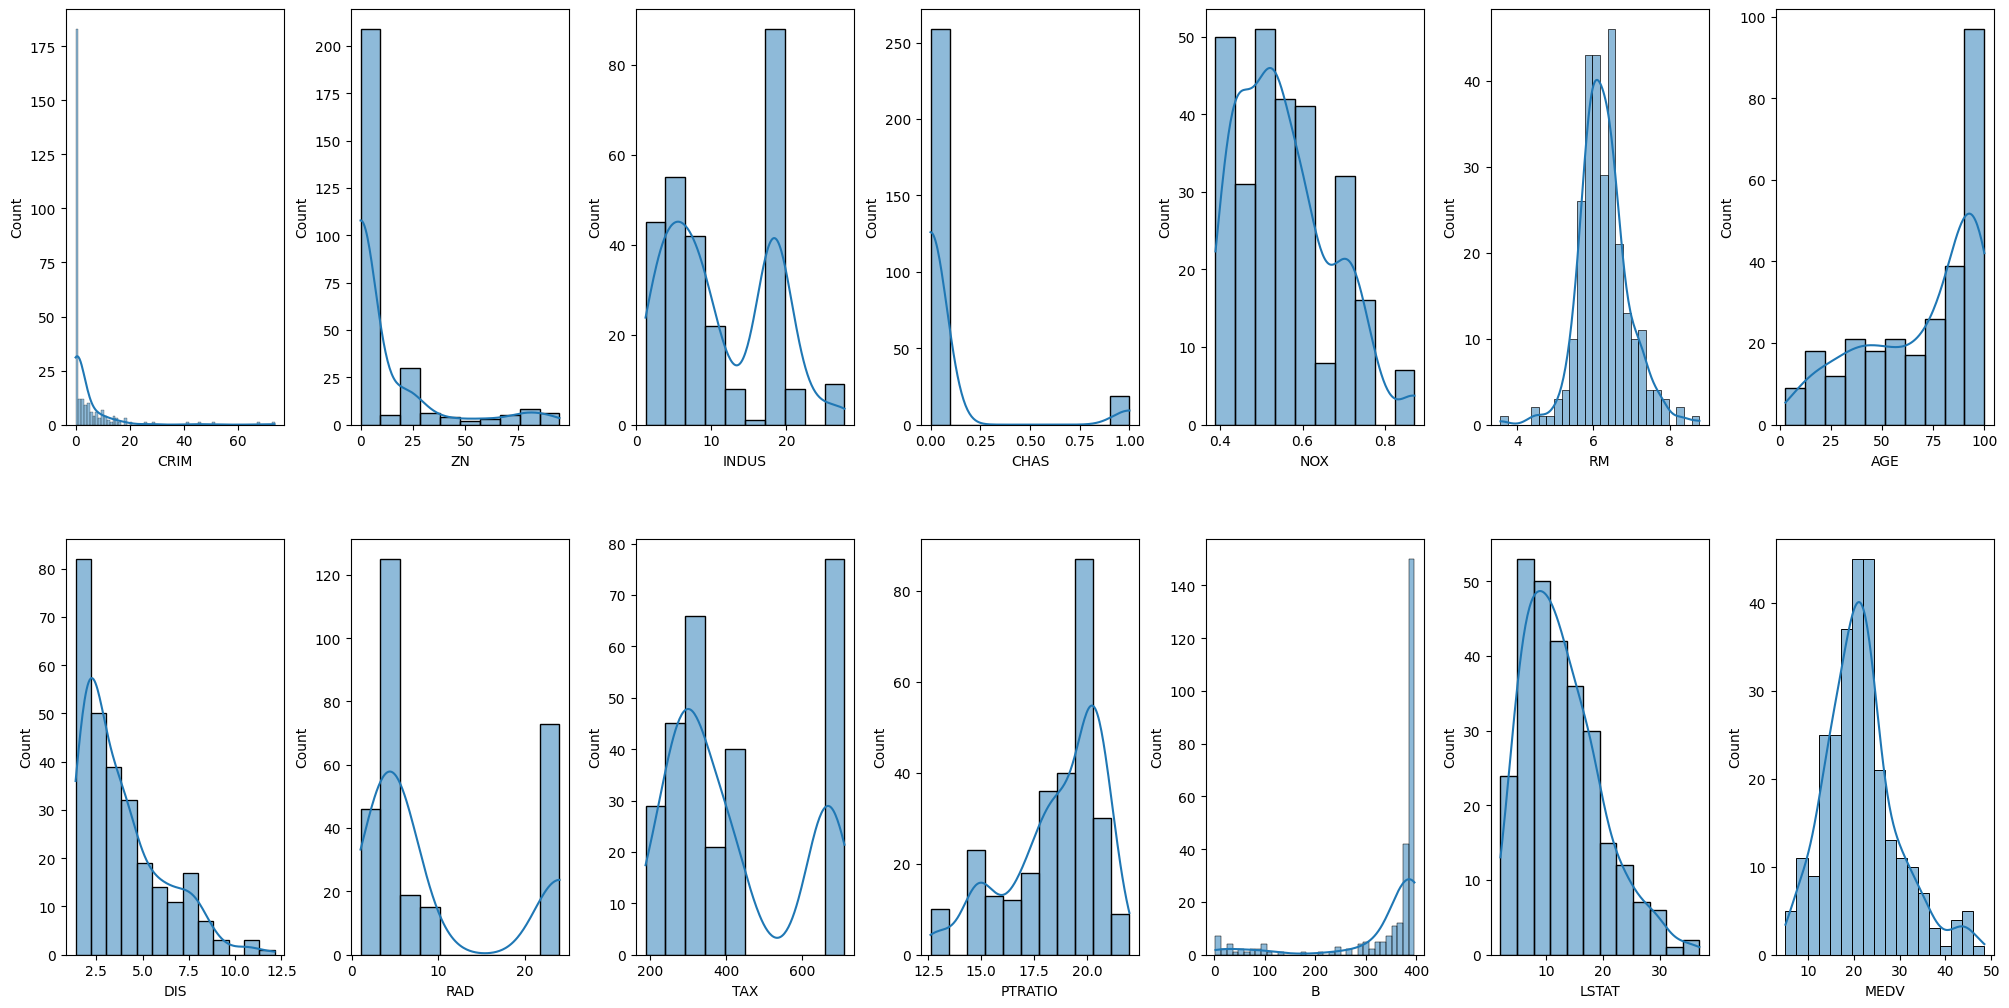

In [12]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in data.items():
    sns.histplot(v, ax=axs[index], kde=True)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()



The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have norma or bimodel ditribution of data except CHAS (which is a discrete variable).

Now let's plot the pairwise correlation on data.


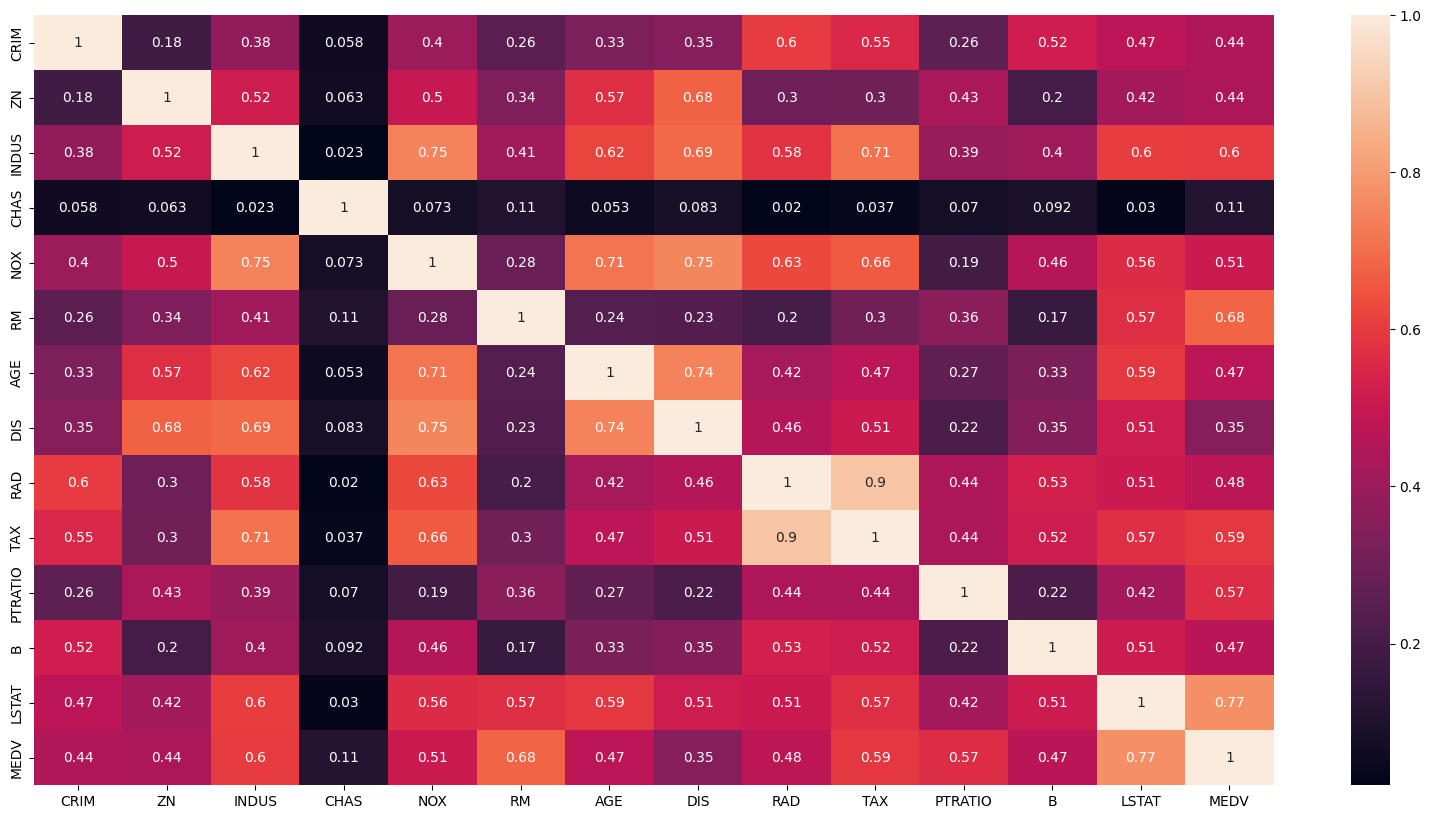

In [11]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)
plt.show()


**Observations**

- From the above coorelation plot we can see that MEDV is strongly correlated to LSTAT, RM

- RAD and TAX are stronly correlated, so we don't include this in our features together to avoid multi-colinearity

<Axes: >

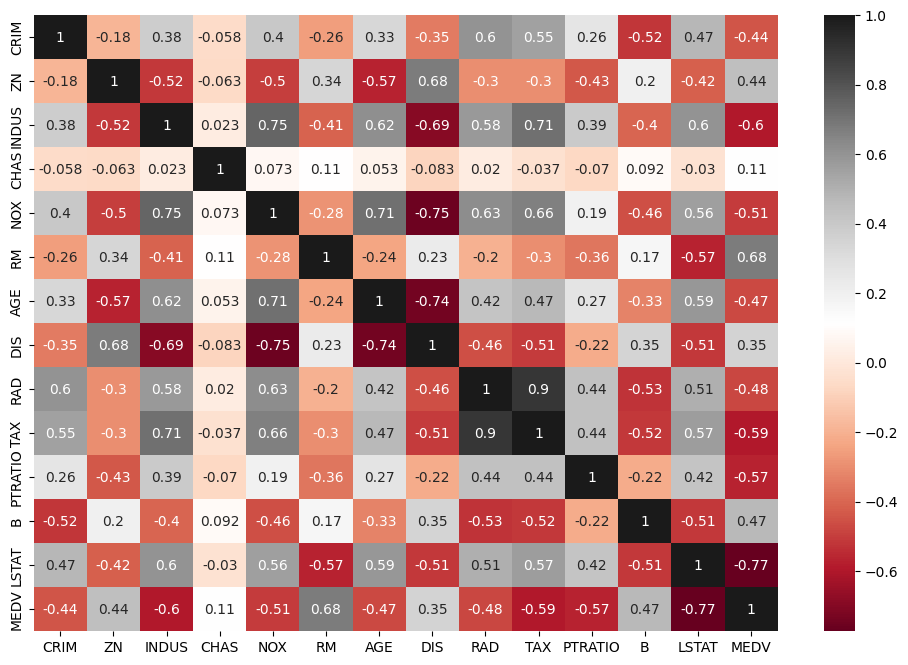

In [33]:
plt.subplots(figsize = (12, 8))
sns.heatmap(data.corr(), cmap = 'RdGy', annot=True)

At this heatmap plot, we can do our analysis better than the pairplot.

Lets focus ate the last line, where y = medv:

When shades of Red/Orange: the more red the color is on X axis, smaller the medv. Negative correlation
When light colors: those variables at axis x and y, they dont have any relation. Zero correlation
When shades of Gray/Black : the more black the color is on X axis, more higher the value med is. Positive correlation

### Lets plot the pairplot, for all different correlations

Negative Correlation.

When x is high y is low and vice versa.

To the right less negative correlation.

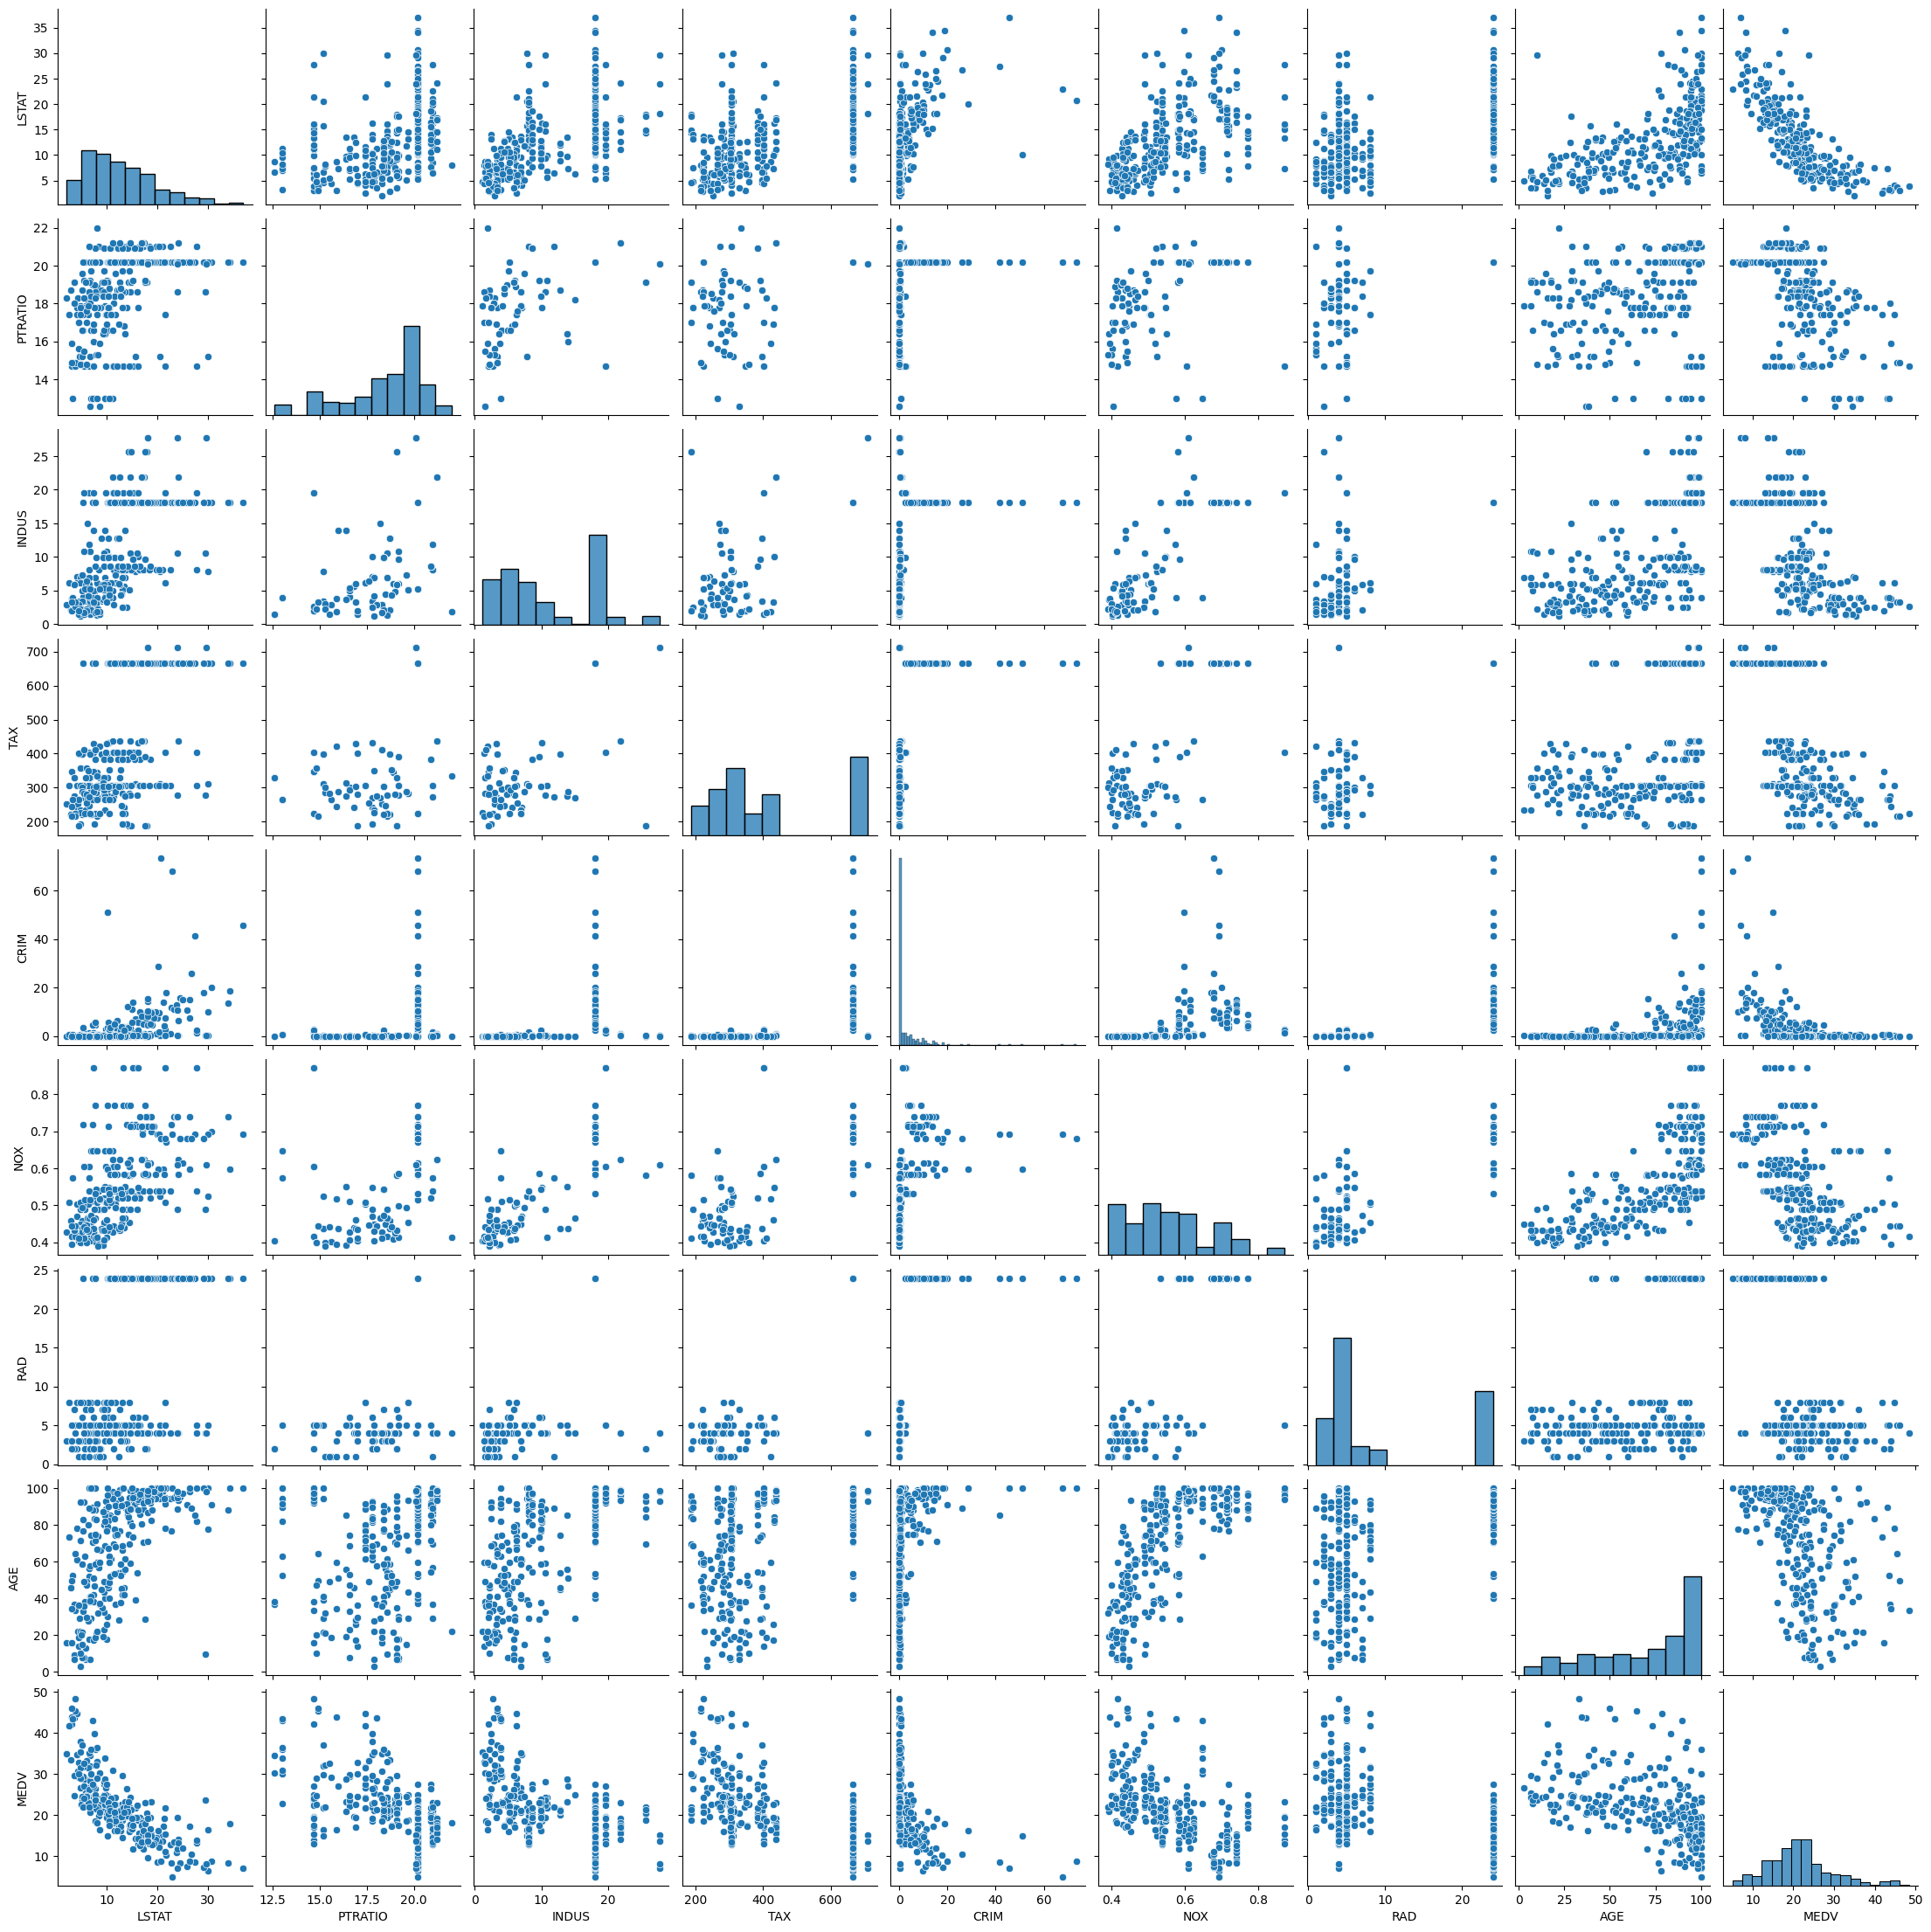

In [14]:
sns.pairplot(data, vars = ['LSTAT', 'PTRATIO', 'INDUS', 'TAX', 'CRIM', 'NOX', 'RAD', 'AGE', 'MEDV'])

Zero Correlation. When x and y are completely independent

Positive Correlation. When x and y go together

to the right more independent.

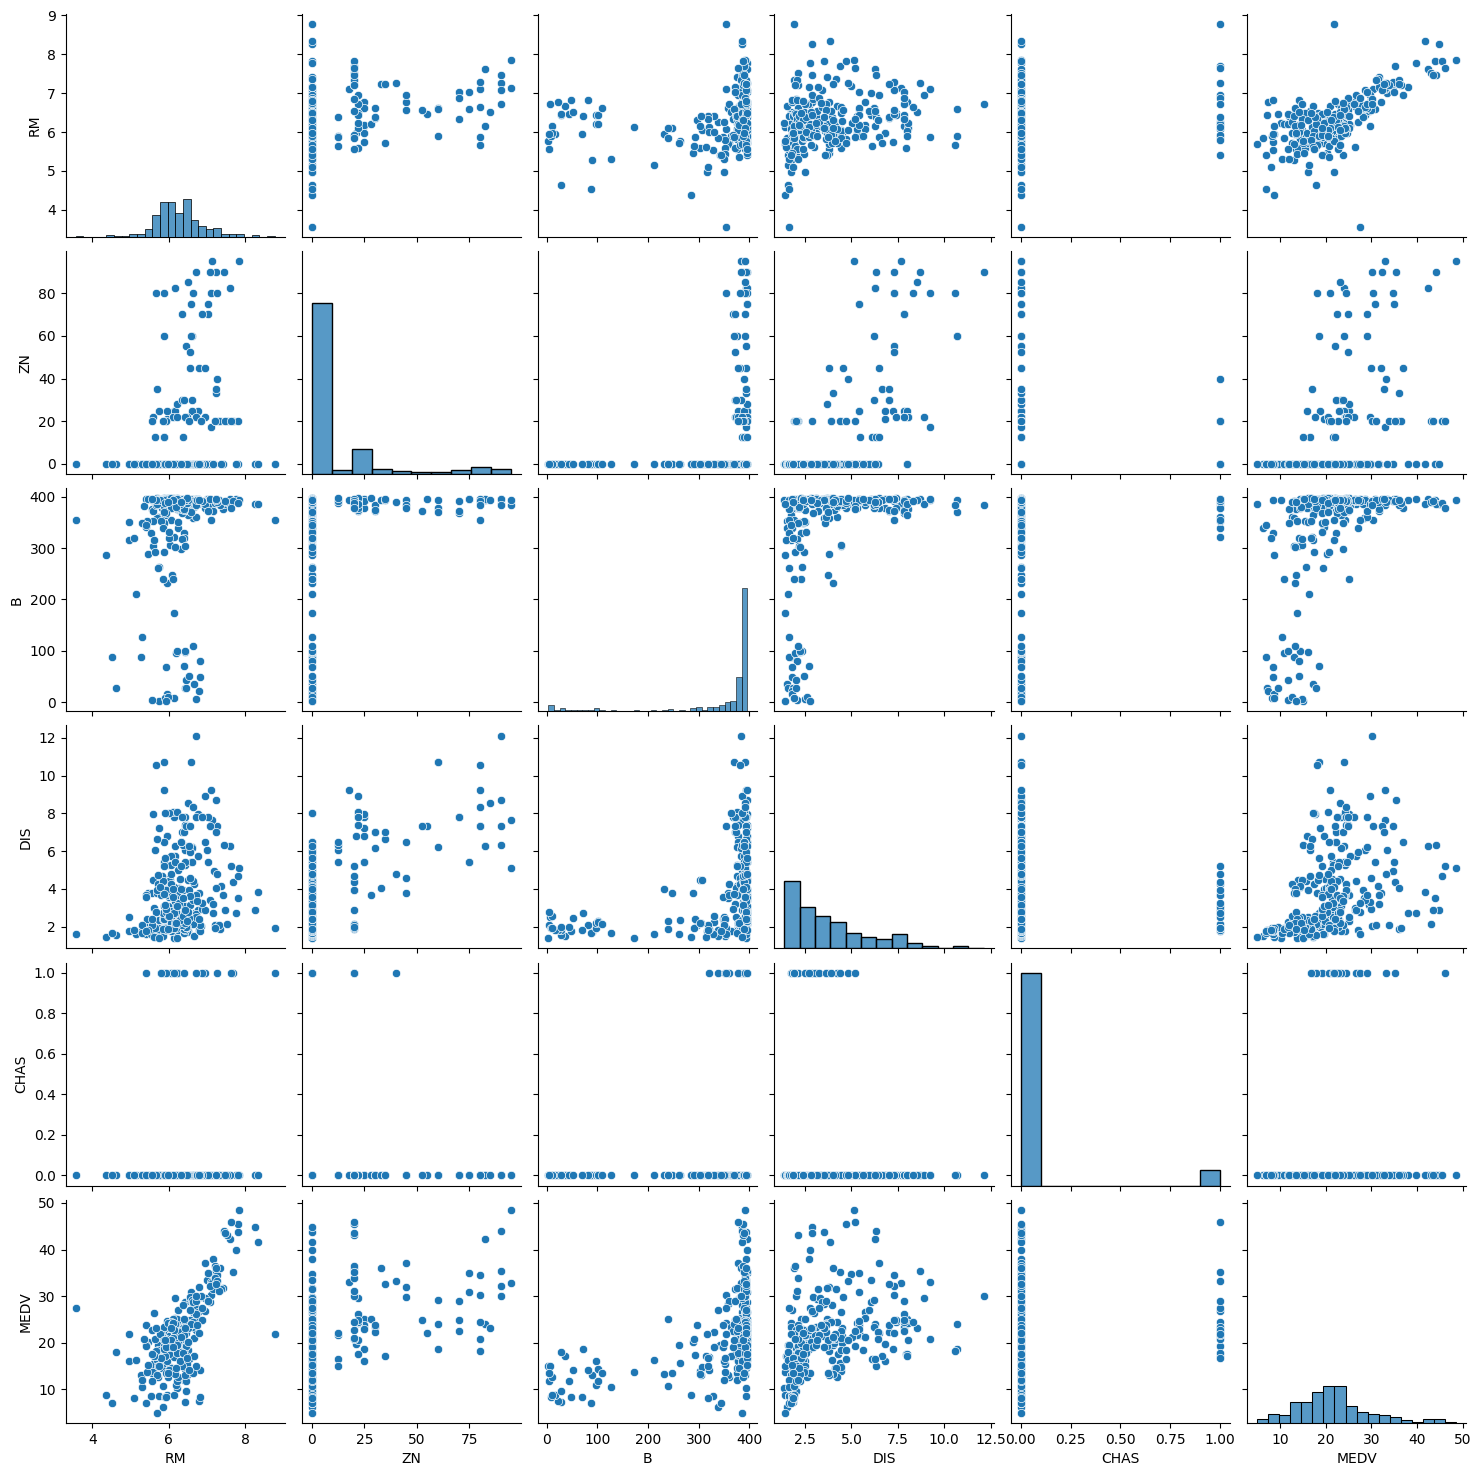

In [15]:
sns.pairplot(data, vars = ['RM', 'ZN', 'B', 'DIS', 'CHAS','MEDV'])

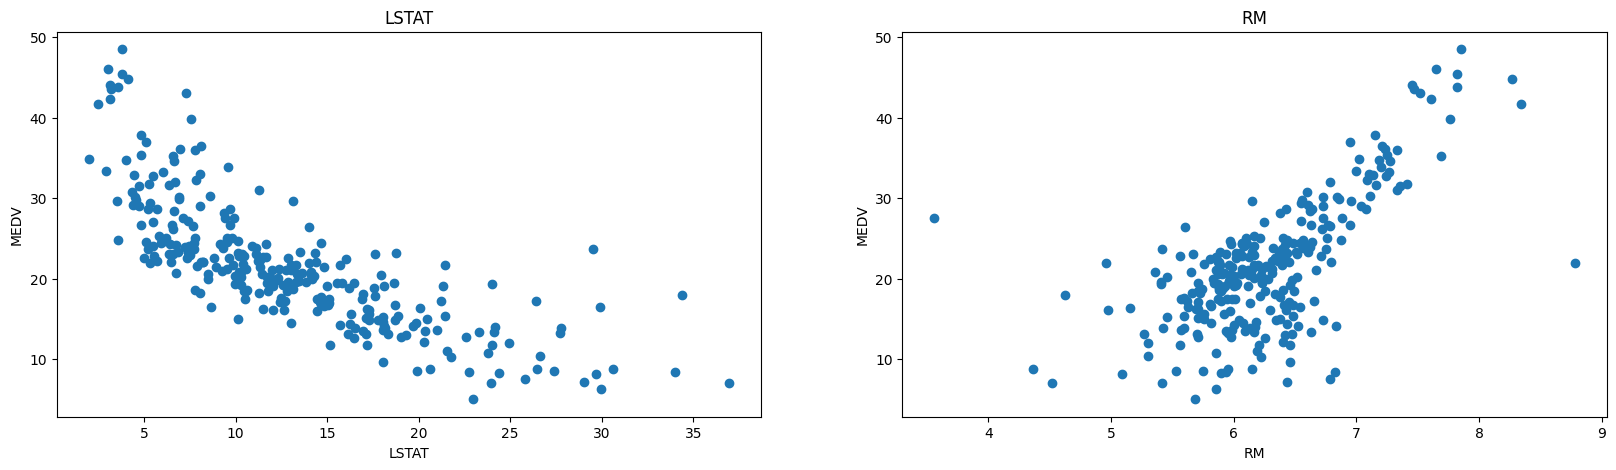

In [16]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = data['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

### Trainning Linear Regression Model¶
#### Define X and Y

X: Varibles named as predictors, independent variables, features.<br>
Y: Variable named as response or dependent variable

In [17]:
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
Y = data['MEDV']

In [18]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(222, 13)
(56, 13)
(222,)
(56,)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [20]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 3.425615249519224
R2 score is 0.8060076044934855


The model performance for testing set
--------------------------------------
RMSE is 3.676675707679394
R2 score is 0.8126892445356679


In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(Y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_test_predict)))

MAE: 2.681169806429957
MSE: 13.517944259439775
RMSE: 3.676675707679394


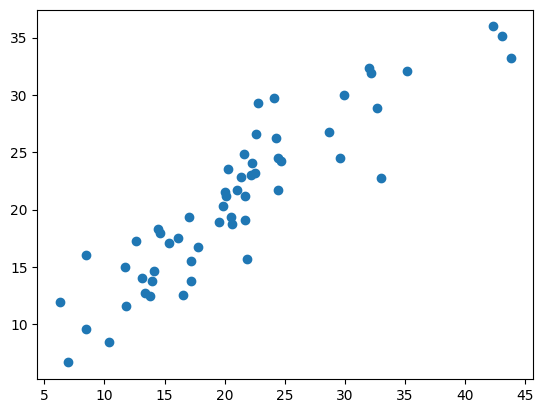

In [26]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def estimate_coef(x, y): 
  # number of observations/points 
  n = np.size(x) 
  
  # mean of x and y vector 
  m_x = np.mean(x) 
  m_y = np.mean(y) 
  
  # calculating cross-deviation and deviation about x 
  SS_xy = np.sum(y*x) - n*m_y*m_x 
  SS_xx = np.sum(x*x) - n*m_x*m_x 
  
  # calculating regression coefficients 
  b_1 = SS_xy / SS_xx 
  b_0 = m_y - b_1*m_x 
  
  return (b_0, b_1) 

In [15]:
def plot_regression_line(x, y, b): 
  # plotting the actual points as scatter plot 
  plt.scatter(x, y, color = "m", 
        marker = "o", s = 30) 
  
  # predicted response vector 
  y_pred = b[0] + b[1]*x 
  
  # plotting the regression line 
  plt.plot(x, y_pred, color = "g") 
  
  # putting labels 
  plt.xlabel('x') 
  plt.ylabel('y') 

In [16]:
# observations / data 
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 

# estimating coefficients 
b = estimate_coef(x, y) 
print(b)

(1.2363636363636363, 1.1696969696969697)


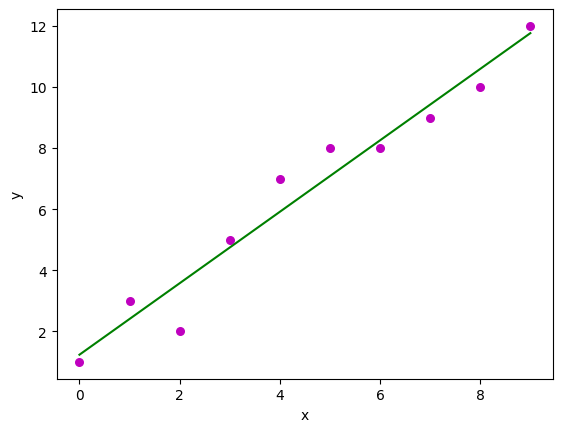

In [18]:
plot_regression_line(x, y, b)